        Income        Age         Loan  Loan to Income  Default
0  66155.92510  59.017015  8106.532131        0.122537        0
1  34415.15397  48.117153  6564.745018        0.190752        0
2  57317.17006  63.108049  8020.953296        0.139940        0
3  42709.53420  45.751972  6103.642260        0.142911        0
4  66952.68885  18.584336  8770.099235        0.130990        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.3 KB
None
             Income          Age          Loan  Loan to Income      Default
count   2000.000000  2000.000000   2000.000000     2000.000000 

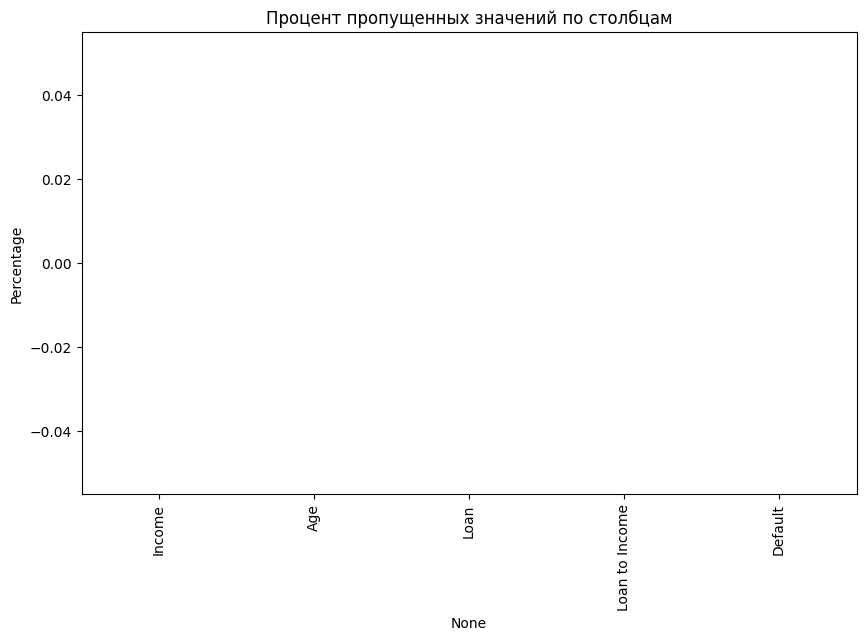

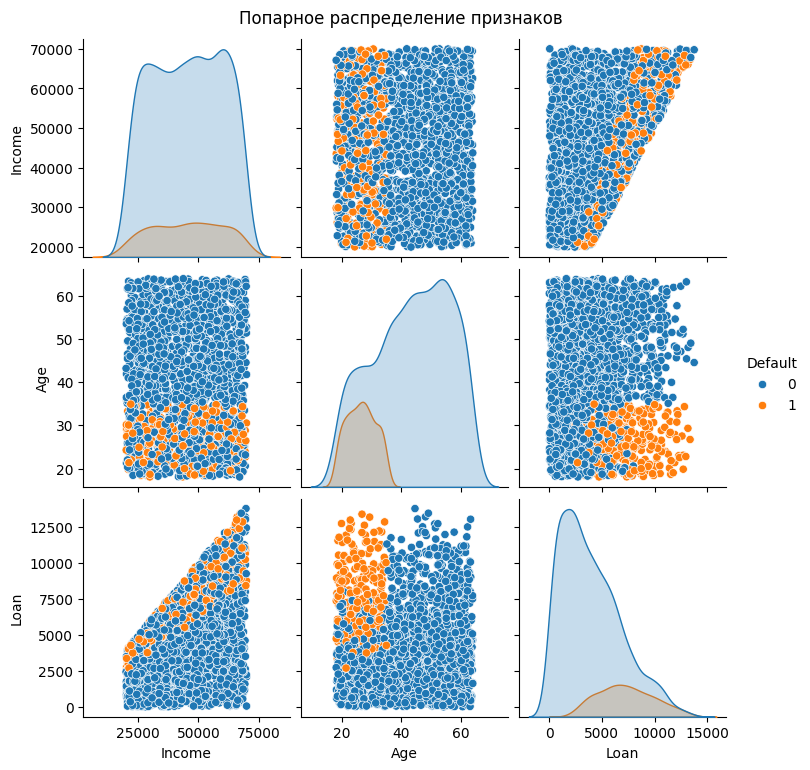

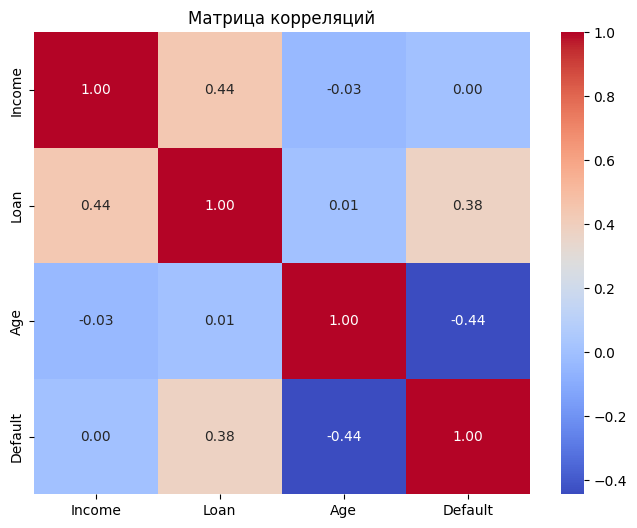

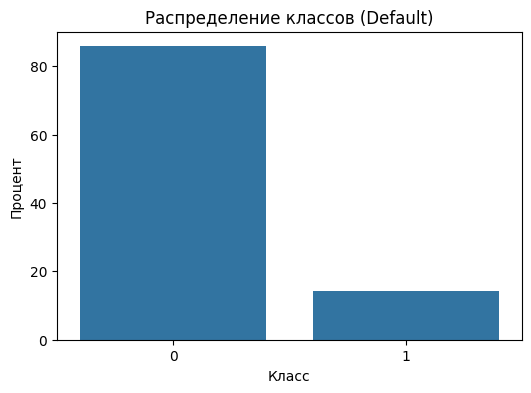

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("credit.csv")

# 1. Предварительный обзор данных
print(df.head())
print(df.info())
print(df.describe())

# 2. Анализ пропущенных значений
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage
})
print(missing_data)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data["Percentage"])
plt.title("Процент пропущенных значений по столбцам")
plt.xticks(rotation=90)
plt.show()

# 3. Диаграммы попарного распределения признаков
sns.pairplot(df[["Income", "Age", "Loan", "Default"]], hue="Default", diag_kind="kde")
plt.suptitle("Попарное распределение признаков", y=1.02)
plt.show()

# 4. Корреляционный анализ
correlation_matrix = df[["Income", "Loan", "Age", "Default"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

# 5. Анализ баланса классов
class_distribution = df["Default"].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title("Распределение классов (Default)")
plt.xlabel("Класс")
plt.ylabel("Процент")
plt.show()